In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:

!pip install datasets simpletransformers wandb
import json
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs
from datasets import load_dataset

dataset = load_dataset("lucadiliello/newsqa")
train_ds = dataset["train"]
val_ds = dataset["validation"]
print(train_ds[0])




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 44.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 104.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=f751322d7b2ae2fab7dfb4300e643b647a8c67be289b94ad340cbc765c8ae0bd
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval
  Attem

2025-10-22 14:22:59.477671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761142979.675242      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761142979.729279      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `ty

README.md:   0%|          | 0.00/681 [00:00<?, ?B/s]

data/train-00000-of-00001-ec54fbe500fc3b(…):   0%|          | 0.00/29.7M [00:00<?, ?B/s]

data/validation-00000-of-00001-3cf888b12(…):   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74160 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4212 [00:00<?, ? examples/s]

{'context': 'NEW DELHI, India (CNN) -- A high court in northern India on Friday acquitted a wealthy businessman facing the death sentence for the killing of a teen in a case dubbed "the house of horrors."\n\n\n\nMoninder Singh Pandher was sentenced to death by a lower court in February.\n\n\n\nThe teen was one of 19 victims -- children and young women -- in one of the most gruesome serial killings in India in recent years.\n\n\n\nThe Allahabad high court has acquitted Moninder Singh Pandher, his lawyer Sikandar B. Kochar told CNN.\n\n\n\nPandher and his domestic employee Surinder Koli were sentenced to death in February by a lower court for the rape and murder of the 14-year-old.\n\n\n\nThe high court upheld Koli\'s death sentence, Kochar said.\n\n\n\nThe two were arrested two years ago after body parts packed in plastic bags were found near their home in Noida, a New Delhi suburb. Their home was later dubbed a "house of horrors" by the Indian media.\n\n\n\nPandher was not named a main

Simple Transformers is a Python library that simplifies the use of Hugging Face's Transformers for various natural language processing (NLP) tasks like question answering (QA).
why am I using Simple Transformers ?
1)easy to experiment with different models 
2)it has built in evaluation metrices 
3)Compatible with NewsQA dataset .

But Newsqa dataset has to be converted into a specific format expected by simple transformers as given below . 

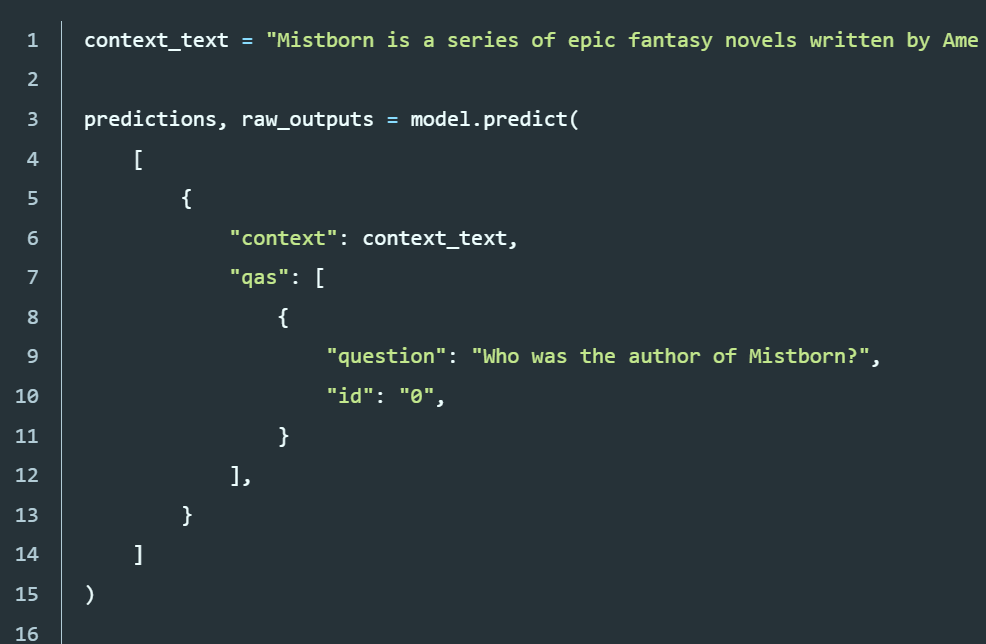

the below code only does the complete conversion and changes the format of newqa dataset 

In [4]:
def format_newsqa_for_simpletransformers(dataset):# Define a function to convert the NewsQA dataset format
    formatted_data = []
    missing = 0

    for sample in dataset:
        context = sample["context"]
        question = sample["question"]
        qid = str(sample.get("key", None))
        answers_field = sample.get("answers", [])

        qas = []
        if answers_field:
            if isinstance(answers_field, dict) and "answer_start" in answers_field and "text" in answers_field:
                answer_texts = answers_field["text"]
                answer_starts = answers_field["answer_start"]

                if not isinstance(answer_texts, list):
                    answer_texts = [answer_texts]
                    answer_starts = [answer_starts]

                answers_list = []
                for text, start in zip(answer_texts, answer_starts):
                    end = start + len(text)
                    answers_list.append({"text": text, "answer_start": start, "answer_end": end})

                qas.append({
                    "question": question,
                    "id": qid if qid else str(len(formatted_data)),
                    "is_impossible": False,
                    "answers": answers_list
                })
            elif isinstance(answers_field, list):
                flat_answers = []
                for a in answers_field:
                    if isinstance(a, list):
                        flat_answers.extend(a)
                    else:
                        flat_answers.append(a)

                answers_list = []
                for text in flat_answers:
                    start = context.find(text)
                    if start != -1:
                        end = start + len(text)
                        answers_list.append({"text": text, "answer_start": start, "answer_end": end})
                    else:
                        missing += 1

                if answers_list:
                    qas.append({
                        "question": question,
                        "id": qid if qid else str(len(formatted_data)),
                        "is_impossible": False,
                        "answers": answers_list
                    })
                else:
                    qas.append({
                        "question": question,
                        "id": qid if qid else str(len(formatted_data)),
                        "is_impossible": True,
                        "answers": []
                    })

        if not qas:
            qas.append({
                "question": question,
                "id": qid if qid else str(len(formatted_data)),
                "is_impossible": True,
                "answers": []
            })

        formatted_data.append({
            "context": context.strip(),
            "qas": qas
        })

    print(f"Skipped {missing} samples where answers not found in context.")
    return formatted_data



train_data_formatted_corrected = format_newsqa_for_simpletransformers(train_ds)
test_data_formatted_corrected = format_newsqa_for_simpletransformers(val_ds)

print("Correctly formatted training data sample:")
print(json.dumps(train_data_formatted_corrected[100], indent=2, ensure_ascii=False))

Skipped 0 samples where answers not found in context.
Skipped 0 samples where answers not found in context.
Correctly formatted training data sample:
{
  "context": "BAGHDAD, Iraq (CNN) -- Iraqi Security Forces captured 66 people believed to be connected to al Qaeda in Iraq terror cells, the U.S. military said Thursday.\n\n\n\nMembers of the Iraqi Security Forces are working in Iraq to capture terrorists and insurgents.\n\n\n\nThe suspects were captured during separate operations in northern Iraq this week, according to a military news release.\n\n\n\nThe suspects included 45 men from al Qaeda in Iraq and 21 suspected terrorists from an umbrella group of al Qaeda in Iraq known as The Islamic State of Iraq, the statement said.\n\n\n\nThe suspects are believed to be part of terror cells responsible for bombings, torturing of civilians, conducting attacks and warning insurgents about upcoming Iraqi and U.S. military operations, the military said.\n\n\n\nOne of the suspects is believed to 

In [5]:
NUM_TRAIN_SAMPLES = 2000
NUM_VAL_SAMPLES = 500

train_ds_small = train_ds.select(range(NUM_TRAIN_SAMPLES))
val_ds_small = val_ds.select(range(NUM_VAL_SAMPLES))

train_data_formatted_small = format_newsqa_for_simpletransformers(train_ds_small)
test_data_formatted_small = format_newsqa_for_simpletransformers(val_ds_small)

Skipped 0 samples where answers not found in context.
Skipped 0 samples where answers not found in context.



1. model used = roberta
2. train epoch =3
3. batch size = 8(both test and train)
4.  Maximum input sequence length = 128 


1)training the model only on 2000 samples
2)testing it on 500 samples 


In [6]:

model_type = "roberta"
model_name = "deepset/roberta-base-squad2" # Pretrained model fine-tuned on SQuAD2 

model_args = QuestionAnsweringArgs()# Create an args object to store all hyperparameters
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.save_model_every_epoch = False
model_args.save_best_model = True
model_args.num_train_epochs = 3
model_args.max_seq_length = 128
model_args.train_batch_size = 8
model_args.eval_batch_size = 8
model_args.evaluate_during_training = True 
model_args.evaluate_during_training_steps = 500
model_args.use_multiprocessing = False
model_args.output_dir = f"outputs/{model_type}/fine_tuned"
model_args.best_model_dir = f"outputs/{model_type}/best_model"
model_args.wandb_project = None  


model = QuestionAnsweringModel(
    model_type,
    model_name,
    args=model_args,
    
)

model.train_model(train_data_formatted_small, eval_data=test_data_formatted_small)


add example index and unique id: 100%|██████████| 2000/2000 [00:00<00:00, 951628.81it/s]


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/question_answering/question_answering_model.py:697: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/558 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/question_answering/question_answering_model.py:720: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


convert squad examples to features:   0%|          | 0/500 [00:00<?, ?it/s]

convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 95.29it/s]A


add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 695803.58it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/question_answering/question_answering_model.py:1194: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():

convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 88.27it/s]A

add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 638791.35it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/558 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/500 [00:00<?, ?it/s]

convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 95.44it/s]A


add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 661770.91it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 94.86it/s]A

add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 584653.47it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/558 [00:00<?, ?it/s]



convert squad examples to features:   0%|          | 0/500 [00:00<?, ?it/s]

convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 94.14it/s]A


add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 575824.27it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]


convert squad examples to features: 100%|██████████| 500/500 [00:05<00:00, 93.34it/s]A

add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 607694.00it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]

(1674,
 {'global_step': [500, 558, 1000, 1116, 1500, 1674],
  'correct': [144, 149, 160, 169, 165, 162],
  'similar': [282, 269, 238, 214, 246, 247],
  'incorrect': [74, 82, 102, 117, 89, 91],
  'train_loss': [1.5255851745605469,
   0.3216257095336914,
   0.005758076906204224,
   0.016141312196850777,
   0.004824936389923096,
   0.03296571224927902],
  'eval_loss': [-7.091697080291971,
   -7.714244981751825,
   -8.768248175182482,
   -8.38227075729927,
   -9.336279653284672,
   -9.337078010948906]})

In [8]:
#final prediction 
result, predictions = model.eval_model(test_data_formatted_small)
print("\nEvaluation Results:")
print(result)


add example index and unique id: 100%|██████████| 500/500 [00:00<00:00, 709696.11it/s]


Running Evaluation:   0%|          | 0/137 [00:00<?, ?it/s]


Evaluation Results:
{'correct': 162, 'similar': 247, 'incorrect': 91, 'eval_loss': -9.337078010948906}


In [9]:
!pip install transformers sentencepiece

After comparing between various pre-trained language translation models like MarianMT, mBART-50, M2M100, the best score is given by MarianMT , thus using it for the final task

In [10]:
from transformers import MarianTokenizer, MarianMTModel


model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer_en_fr = MarianTokenizer.from_pretrained(model_name)
mt_model = MarianMTModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

In [12]:
def translate_en_to_fr(texts):

    translated_texts = []

    for text in texts:
       
        inputs = tokenizer_en_fr(text, return_tensors="pt", padding=True)
       
        translated_tokens = mt_model.generate(**inputs)
       
        french_text = tokenizer_en_fr.decode(translated_tokens[0], skip_special_tokens=True)
        translated_texts.append(french_text)

    return translated_texts


In [14]:
results = []

for item in test_data_formatted_small:
    context = item["context"]
    for qa in item["qas"]:
        qid = qa["id"]
        question = qa["question"]

        real_ans = qa["answers"][0]["text"] if qa["answers"] else ""

        pred_ans = predictions["correct_text"].get(qid, "")

        pred_ans_fr = translate_en_to_fr([pred_ans])[0] if pred_ans else ""
        results.append({
            "question": question,
            "real_answer": real_ans,
            "predicted_answer": pred_ans,
            "predicted_answer_fr": pred_ans_fr
        })


import pandas as pd
df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', 30) 
df_results.head(30)


,question,real_answer,predicted_answer,predicted_answer_fr
0,What will be nominated?,three different videos,,
1,What does the Harrison Ford video feature?,"getting his chest waxed,",,
2,What videos will you send?,environmental,,
3,What is Ford getting waxed?,his chest,,
4,Who got his chest waxed?,Harrison Ford,,
5,How do you send in your video?,Use the iReport form,,
6,What type of videos should you nominate?,think are the best.,,
7,What did Steve Bruce describe Amire Zaki as?,unprofessional.,,
8,Which team does Zaki play for?,Wigan Athletic,Wigan Athletic,Wigan Athlétisme
9,Which club did Amir Zaki fail to return to?,Wigan Athletic,Wigan Athletic,Wigan Athlétisme


Since the model was trained only on a small subset of the dataset, its exposure to diverse question–answer pairs and contextual variations was very limited.
As a result, it struggled to generalize to unseen questions in the test data, often failing to extract correct or complete answers.